In [1]:
from dolo import *
import matplotlib.pyplot as plt

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


ImportError: cannot import name 'solve' from 'numpy' (/Volumes/Sync/Sys/OSX/linked/root/usr/local/bin/miniconda/envs/dolo-dev/lib/python3.9/site-packages/numpy/__init__.py)

In [2]:
model = yaml_import("../models/consumption_savings_iid.yaml")

In [3]:
dr = time_iteration(model)

---------------------------------------------------
| Start Time Iterations.                          |
---------------------------------------------------
| N    | Error     | Gain      | Time      | nit  |
---------------------------------------------------
|    1 | 1.000e+00 |       nan | 1.172e+00 |    5 |
|    2 | 2.320e-02 | 2.320e-02 | 6.804e-03 |    5 |
|    3 | 5.379e-03 | 2.319e-01 | 4.476e-03 |    4 |
|    4 | 5.358e-03 | 9.960e-01 | 4.707e-03 |    4 |
|    5 | 5.382e-03 | 1.005e+00 | 4.420e-03 |    3 |
|    6 | 5.409e-03 | 1.005e+00 | 3.250e-03 |    3 |
|    7 | 5.437e-03 | 1.005e+00 | 4.435e-03 |    3 |
|    8 | 5.466e-03 | 1.005e+00 | 3.369e-03 |    3 |
|    9 | 5.495e-03 | 1.005e+00 | 6.276e-03 |    3 |
|   10 | 5.524e-03 | 1.005e+00 | 3.388e-03 |    3 |
|   11 | 5.553e-03 | 1.005e+00 | 3.630e-03 |    3 |
|   12 | 5.582e-03 | 1.005e+00 | 3.434e-03 |    3 |
|   13 | 5.612e-03 | 1.005e+00 | 4.518e-03 |    3 |
|   14 | 5.641e-03 | 1.005e+00 | 8.420e-03 |    3 |
|   15 | 5.6

One can also try the faster version

## Stochastic Simulations

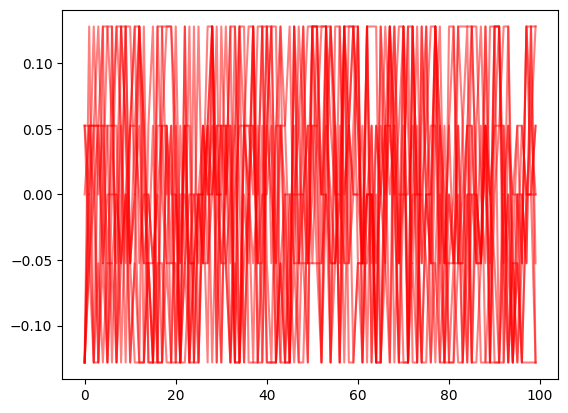

In [4]:
# Shocks are discretized as a markov chain by default:
dp = model.exogenous.discretize()
sim_shock = dp.simulate(10, 100, i0=1)
for i in range(10):
    plt.plot(sim_shock[:,i,0], color='red', alpha=0.5)

In [5]:
sim = simulate(model, dr, i0=1, N=100)

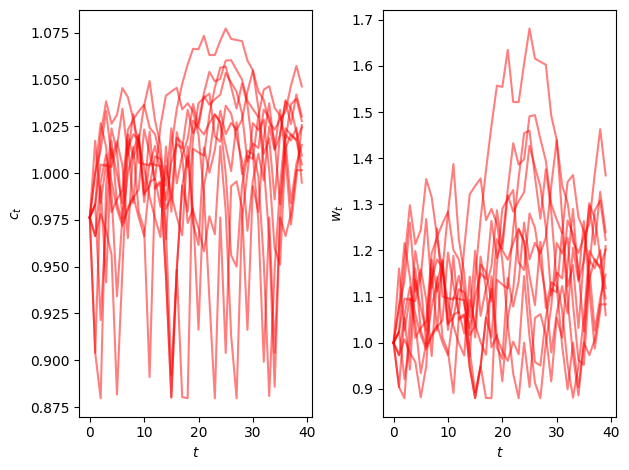

In [6]:
plt.subplot(121)
for i in range(10):
    plt.plot(sim.sel(N=i,V='c'), color='red', alpha=0.5)
plt.ylabel("$c_t$")
plt.xlabel("$t$")
plt.subplot(122)
for i in range(10):
    plt.plot(sim.sel(N=i,V='w'), color='red', alpha=0.5)
plt.xlabel("$t$")
plt.ylabel("$w_t$")

plt.tight_layout()

## Ergodic distribution

In [7]:
sim_long = simulate(model, dr, i0=1, N=1000, T=200)

    

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



Text(0.5, 0, '$w$')

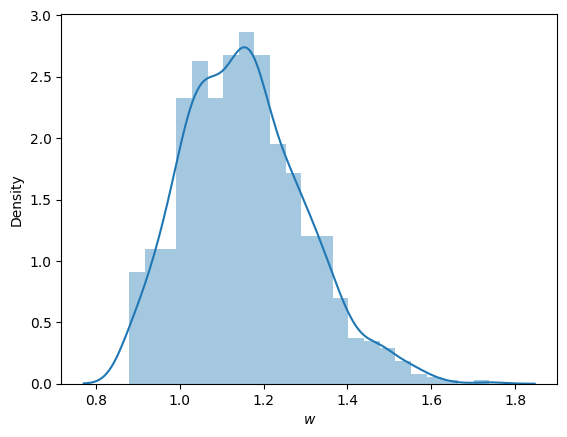

In [8]:
import seaborn
seaborn.distplot(sim_long.sel(T=199, V='w'))
plt.xlabel("$w$")

## Plotting Decision Rule

In [9]:
tab = tabulate(model, dr,'w')

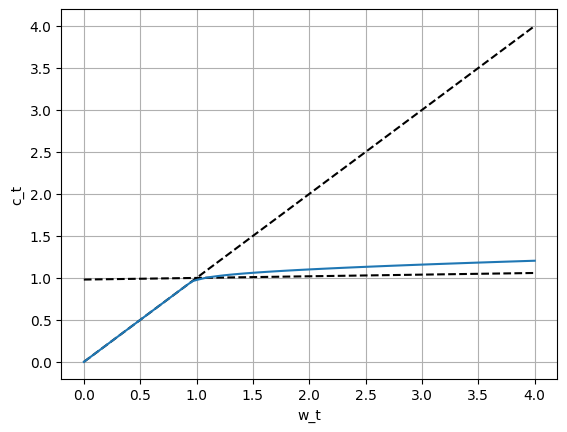

In [10]:
stable_wealth = model.eval_formula('1/r+(1-1/r)*w(0)', tab)
plt.plot(tab['w'], tab['w'],color='black', linestyle='--')
plt.plot(tab['w'], stable_wealth,color='black', linestyle='--')
plt.plot(tab['w'], tab['c'])
plt.xlabel("w_t")
plt.ylabel("c_t")
plt.grid()